<a href="https://colab.research.google.com/github/All4Nothing/pytorch-DL-project/blob/main/Ch04_Deep_RNN(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. 심층 순환 신경망 아키텍처 (Deep RNN Architecture)

CNN은 각 입력 X가 다른 입력에 독립적이며, 각 출력 y가 데이터셋의 다른 출력과 독립적인 X와 y 사이 1:1 매핑을 학습한다.

RNN에서는 X(혹은 y)가 단일의 독립 데이터 포인트뿐 아니라 데이터 포인트의 시간 순서 [X1, X2, ..Xt] (또는 [y1, y2, ..yt])인 순서를 모델링할 수 있다. X2(시간 단계 2에서 데이터 포인트)는 X1에 종속되고 X3는 X2와 X1에 종속되는 식이다.  
이런 네트워크를 순환 신경망(RNN, Recurrent Neural Network)으로 분류한다. 이 네트워크는 네트워크에서 주기를 생성하는 모델에 추가적인 가중치를 포함해 데이터의 시간적 측면을 모델링할 수 있다. 이렇게 하면 다이어그램에서 보듯이 상태를 유지하는 데 도움이 된다.  
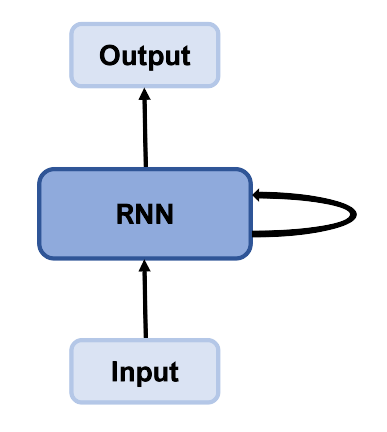

주기(cycle)의 개념은 순환(recurrence)이라는 용어를 설명하고, 이 순환은 RNN에서 기억(memory)의 개념을 수립하는 데 도움이 된다. RNN에서는 숨겨진 내부 상태를 유지하면서 시간 단계 t에서 중간 출력을 시간 단계 t+1의 입력으로 쉽게 사용할 수 있다. 이러한 단계에 걸친 연결을 **순환 연결(recurrent connection)**이라고 한다.

## 순환 신경망의 발전

### 순환 신경망 유형  
* One to One : ex. 이미지 분류(이미지 픽셀을 순차적으로 처리함으로서) (그다지 유용하지는 않다.)
* One to Many : ex. 이미지 캡션 생성: 이미지가 주어지면 이를 설명하는 문장/텍스트 일부를 생성한다.
* Many to One : ex. 감성 분석: 문장이나 일부가 주어졌을 때 긍정적인 표현인지, 부정적인 표현인지, 중립적인 표현인지 등을 분류한다.
* Many to Many(Incoder-Decoder) : ex. 기계 번역: 자연어로 된 문장/텍스트를 가져와 통합된 고정 크기의 표현으로 인코딩하고 해당 표현을 디코딩해 다른 언어로 된 같은 뜻의 문장/텍스트를 생성한다.
* Many to Many(Simultaneous) : ex. 명명된 개체 인식: 문장/텍스트가 주어지면 이름, 조직, 위치 등과 같이 명명된 개체 범주로 단어를 태깅한다.

![RNN](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FZMIHH%2FbtqISuYWJBv%2Fb0yfFKD9raXfhkuWC2uLY0%2Fimg.png)
*red : input, green : hidden layer, blue : output*

RNN의 막강한 특징 중 하나는 다양한 길이(t)의 순차 데이터를 다룰 수 있다는 것이다. 길이가 서로 달라도, 길이가 짧은 데이터에 패딩을 추가하고 길이가 긴 데이터는 잘라내는 방법으로 처리할 수 있다.
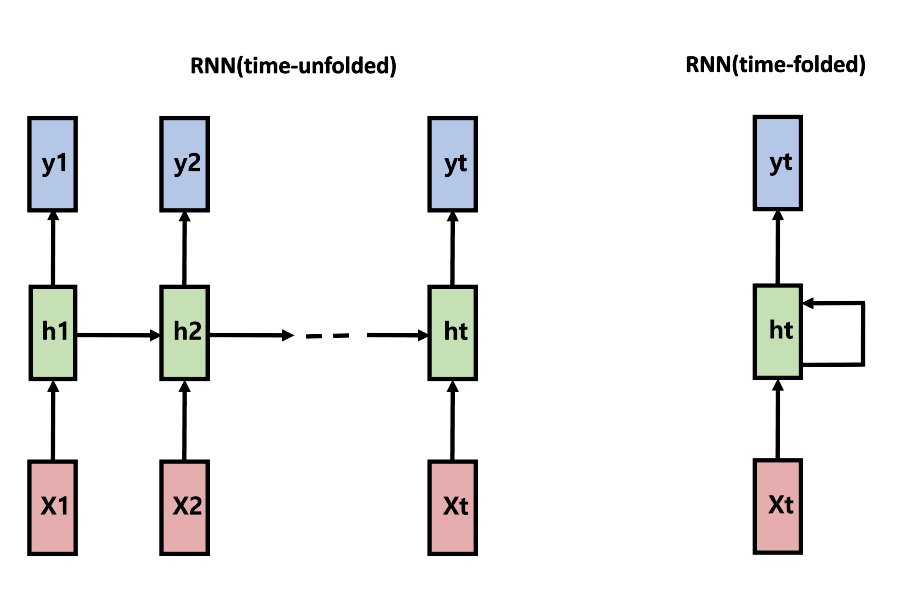  
*t는 순차 데이터에서 전체 시간 단계의 수*

**BidirectionRNN**  
* RNN이 순차 데이터에서 성능이 좋지만, 언어 변역 같은 일부 순서가 중요한 작업은 과거와 미래 정보를 모두 살펴봄으로써 더 효율적으로 수행할 수 있다. 예를 들어 영어 'I see you'를 프랑스어로 올바르게 번역하려면, 프랑스어로 두 번째와 세번 째 단어를 쓰기 전에 영어 세단어 모두를 알아야 한다.  
양방형 RNN은 내부적으로 작동하는 RNN이 2개 있다. 하나는 처음부터 끝까지 순서대로 실행되고, 다른 하나는 끝에서 처음으로 가는 순서대로 실행된다.  

**LSTM**  
* RNN은 순차 데이터를 다룰 수 있고 정보를 기억할 수 있지만, 경사가 폭발하거나 소실되는 문제를 안고 있다. 이 문제는 순환 신경망을 시간 축에 따라 펼치면 네트워크가 극단적으로 깊어지기 때문에 일어난다.  
이 문제를 해결하기 위해 RNN 셀이 더 정교한 메모리 셀인 LSTM(Long-short term memory) 셀로 교체됐다.  
RNN 셀에는 일반적으로 시그모이드(sigmoid)나 tanh 활성화 함수가 사용된다. 시그모이드 함수는 출력값을 0(보낼 정보 없음)과 1(보낼 정보 있음) 사이로 제어할 수 있으며 tanh 함수는 -1과 1 사이로 제어할 수 있다.  
tanh는 출력값 평균이 0이고 일반적으로 경사가 크므로 학습(수렴) 속도를 빠르게 해줘서 더 유리한 점이 있다. 이 활성화 함수는 현재 시간 단계의 입력과 이전 시간 단계의 은닉 상태를 결합할 때 적용된다.  
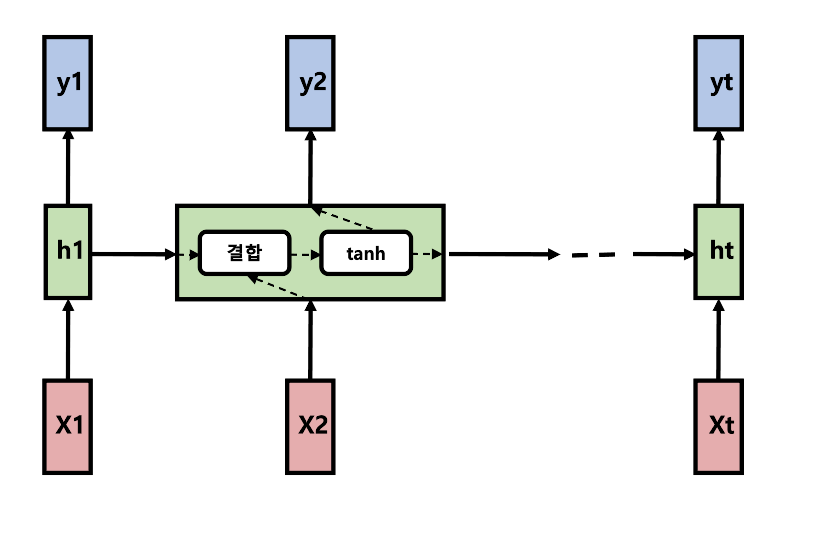  
  *RNN 셀*  
time-unfolded RNN 셀에서 경사 항을 곱하기 때문에, 경삿값은 backpropagation되는 동안 RNN 셀에서 지속적으로 소실되거나 계속 증가한다. 따라서 RNN이 짧은 길이에서 순차적 정보를 기억할 수는 있어도 길이가 길어지면 곱셈이 많아져 기억하기 힘들어진다.  
LSTM 계층은 다양한 time-unfolded LSTM셀로 구성된다. 정보는 하나의 셀에서 다른 셀로 셀 상태의 형태로 전달된다. 이 셀 상태는 게이트의 매커니즘을 통해 곱셈과 덧셈을 사용해 제어되거나 가공된다. 이 게이트는 이전 셀에서 오는 정보를 보존하거나 잊어버리면서 다음 셀로 흐르는 정보를 제어할 수 있다.   
![LSTM network](https://miro.medium.com/v2/resize:fit:1400/1*7cMfenu76BZCzdKWCfBABA.png)  
  *LSTM network*  
LSTMM은 훨씬 더 긴 순차 데이터를 효율적으로 다룰 수 있다는 점에서 RNN에 혁신을 일으켰다.

**stacked LSTM**  
단일 계층의 LSTM 네트워크에서도 경사가 소실되거나 폭발하는 문제를 극복하는 것 같지만, LSTM 계층을 여러 개 쌓으면 음성 인식처럼 다양한 순차 처리 작업에서 상당히 복잡한 패턴을 학습하는 데 더 많은 도움이 된다.  
LSTM셀은 본래 LSTM 계층을 시간 차원으로 쌓은 것이다. LSTM 계층을 공간 차원에서 몇 개 쌓으면 공간상에 필요한 추가적인 깊이를 제공하게 된다.  
이 모델의 단점이라면 깊이가 늘어나고 순환 연결이 늘어나서 훈련 속도가 상당히 느리다는 것이다. 또한, LSTM 계층이 추가되면 모든 train iteration에서 시간 차원으로 펼쳐져야 한다. 따라서 여러 겹 쌓인 순환망 모델을 훈련 시키는 것은 일반적으로 병렬 수행이 불가능하다.

**GRU**  
LSTM 셀에는 internal state와 external state가 있고 input gate, forget gate, output gate가 있다. 게이트 순환 유닛(GRU, gated recurrent unit)이라는 비슷한 유형의 셀이 2014년에 개발되어 gradient vanishing/exploding 문제를 효과적으로 처리하면서 Long Term Dependency를 학습했다.  
GRU에는 하나의 상태와 reset gate(input gate와 forget gate의 조합)와 update gate가 있다.  
![gru](https://cdn-images-1.medium.com/freeze/max/1000/1*GSZ0ZQZPvcWmTVatAeOiIw.png?q=20)

**Gated Orthogonal Recurrent Units**  
GRU 아이디어와 Unitary RNN의 결합. Unitary RNN은 gradient vanishing/exploding 문제를 해결하기 위해 unitary 행렬(직교 행렬)을 RNN의 hidden state loop 행렬로 사용하는 아이디럴 기반으로 만들어졌다. 경삿값이 벗어나면 hidden-hidden 가중치 행렬의 고윳값(eigenvalues)이 1에서 벗어나기 때문에 작동된다. 이로 인해 이 행렬은 경사 문제를 해결하기 위해 직교 행렬로 교체 됐다.

## Sentiment Analysis를 위해 RNN 훈련하기
단방향 단층 RNN

## 텍스트 데이터셋 로딩 및 전처리

In [5]:
import os
import time
import numpy as np
from tqdm import tqdm
from string import punctuation # # 구두점(문장부호)
from collections import Counter
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(123)

**Dataset Instructions:**
* You need to download the dataset from here: https://ai.stanford.edu/~amaas/data/sentiment/
* Then, you need to unzip the downloaded zipped file in the present working directory
* That should result in a new folder named aclImdb under the present working directory

In [9]:
!tar -xzvf "/content/aclImdb_v1.tar.gz"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclI

In [10]:
# read sentiments and reviews data from the text files
review_list = []
label_list = []
for label in ['pos', 'neg']:
    for fname in tqdm(os.listdir(f'./aclImdb/train/{label}/')):
        if 'txt' not in fname:
            continue
        with open(os.path.join(f'./aclImdb/train/{label}/', fname), encoding="utf8") as f:
            review_list += [f.read()] # f.read() 는 파일의 내용 전체를 문자열로 리턴
            label_list += [label]
print ('Number of reviews :', len(review_list))

100%|██████████| 12500/12500 [00:00<00:00, 40942.06it/s]

Number of reviews : 25000


In [11]:
# pre-processing review text
review_list = [review.lower() for review in review_list]
review_list = [''.join([letter for letter in review if letter not in punctuation]) for review in tqdm(review_list)]

# accumulate all review texts together
reviews_blob = ' '.join(review_list)

# generate list of all words of all reviews
review_words = reviews_blob.split()

# get the word counts
count_words = Counter(review_words)

# sort words as per counts (decreasing order)
total_review_words = len(review_words)
sorted_review_words = count_words.most_common(total_review_words) # 가장 흔한 단어를 total_review_wrds만큼 return

print(sorted_review_words[:10])

100%|██████████| 25000/25000 [00:03<00:00, 7770.99it/s] 


[('the', 334691), ('and', 162228), ('a', 161940), ('of', 145326), ('to', 135042), ('is', 106855), ('in', 93028), ('it', 77099), ('i', 75719), ('this', 75190)]


이론적으로 불용어를 제거하지만, 여기선 고급 텍스트 처리 단계 건너뜀

In [18]:
# create word to integer (token) dictionary in order to encode text as numbers
vocab_to_token = {word:idx+1 for idx, (word, count) in enumerate(sorted_review_words)}
print(list(vocab_to_token.items())[:10])

[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('in', 7), ('it', 8), ('i', 9), ('this', 10)]


In [19]:
reviews_tokenized = []
for review in review_list:
    word_to_token = [vocab_to_token[word] for word in review.split()]
    reviews_tokenized.append(word_to_token)
print(review_list[0])
print()
print (reviews_tokenized[0])

i never thought an old cartoon would bring tears to my eyes when i first purchased casper  friends spooking about africa i so much wanted to see the very first casper cartoon entitled the friendly ghost 1945 but when i saw the next cartoon theres good boos tonight 1948 it made me break down i couldnt believe how sad and tragic it was after seeing caspers fox get killed i never saw anything like that in the other casper cartoons this is the saddest one of all it was so depressing i just couldnt watch it again its just like seeing lassie die at the end of a movie i know its a classicbut its too much for us old cartoon fans to handle like me if i wanted to watch something old and classic i rather watch something happy and funny but when i think about this casper cartoon i think about my cats

[9, 109, 198, 33, 164, 1077, 58, 691, 1662, 5, 55, 515, 50, 9, 85, 4534, 6606, 339, 57550, 42, 2396, 9, 37, 72, 452, 5, 67, 1, 52, 85, 6606, 1077, 5581, 1, 2786, 1202, 6023, 18, 50, 9, 207, 1, 365, 1

In [20]:
# encode sentiments as 0 or 1
encoded_label_list = [1 if label =='pos' else 0 for label in label_list]

reviews_len = [len(review) for review in reviews_tokenized]

reviews_tokenized = [reviews_tokenized[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_label_list = np.array([encoded_label_list[i] for i, l in enumerate(reviews_len) if l> 0 ], dtype='float32')

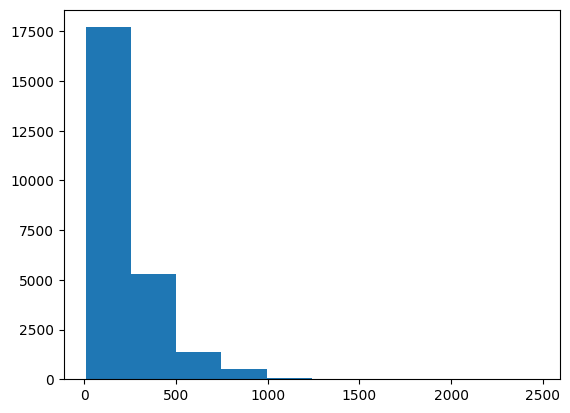

In [24]:
# sequence length 조정. sequence length보다 짧은 경우 0 padding, 긴 경우 slicing
def pad_sequence(reviews_tokenized, sequence_length):
    ''' returns the tokenized review sequences padded with 0's or truncated to the sequence_length.
    '''
    padded_reviews = np.zeros((len(reviews_tokenized), sequence_length), dtype = int)

    for idx, review in enumerate(reviews_tokenized):
        review_len = len(review)

        if review_len <= sequence_length:
            zeroes = list(np.zeros(sequence_length - review_len))
            new_sequence = zeroes+review
        elif review_len > sequence_length:
            new_sequence = review[0:sequence_length]

        padded_reviews[idx,:] = np.array(new_sequence)

    return padded_reviews

sequence_length = 512
padded_reviews = pad_sequence(reviews_tokenized=reviews_tokenized, sequence_length=sequence_length)

plt.hist(reviews_len);

In [25]:
train_val_split = 0.75
train_X = padded_reviews[:int(train_val_split*len(padded_reviews))]
train_y = encoded_label_list[:int(train_val_split*len(padded_reviews))]
validation_X = padded_reviews[int(train_val_split*len(padded_reviews)):]
validation_y = encoded_label_list[int(train_val_split*len(padded_reviews)):]

In [26]:
## If while training, you get a runtime error that says: "RuntimeError: Expected tensor for argument #1 'indices' to have scalar type Long".
## simply uncomment run the following lines of code additionally
# train_X = train_X.astype('int64')
# train_y = train_y.astype('int64')
# validation_X = validation_X.astype('int64')
# validation_y = validation_y.astype('int64')

In [27]:
# generate torch datasets
train_dataset = TensorDataset(
    torch.from_numpy(train_X).to(device), torch.from_numpy(train_y).to(device)
)
validation_dataset = TensorDataset(
    torch.from_numpy(validation_X).to(device), torch.from_numpy(validation_y).to(device)
)

batch_size = 32
# torch dataloaders (shuffle data)
train_dataloader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)
validation_dataloader = DataLoader(
    validation_dataset, batch_size=batch_size, shuffle=True
)

1) torch.Tensor()

tensor로 변환할 때 새 메모리를 할당한다.


```
import torch
import numpy as np
a = np.array([1,2,3,4])
b = torch.Tensor(a)
print('output tensor:',b)

b[0] = -1
print('It cannot change np.array:',a)
```



2) torch.from_numpy()

tensor로 변환할 때, 원래 메모리를 상속받는다. (=as_tensor())


```
a = np.array([1,2,3,4])
b = torch.from_numpy(a)
print('output tensor:',b)

b[0] = -1
print('It can change np.array:',a)
```



In [29]:
# get a batch of train data
train_data_iter = iter(train_dataloader)
X_example, y_example = next(train_data_iter) # train_data_iter.next() ->  error 떠서 직접 수정
print('Example Input size: ', X_example.size()) # batch_size, seq_length
print('Example Input:\n', X_example)
print()
print('Example Output size: ', y_example.size()) # batch_size
print('Example Output:\n', y_example)

Example Input size:  torch.Size([32, 512])
Example Input:
 tensor([[    0,     0,     0,  ...,     3, 36043,    60],
        [    0,     0,     0,  ...,     3,   508,   128],
        [    0,     0,     0,  ...,     5,    39,  5181],
        ...,
        [ 6149,     6,    78,  ...,     3,  2786,    96],
        [    0,     0,     0,  ...,     8,   256,    45],
        [    0,     0,     0,  ..., 17949,    70,  8079]], device='cuda:0')

Example Output size:  torch.Size([32])
Example Output:
 tensor([0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
       device='cuda:0')


### 모델 instance화 및 훈련

In [30]:
class RNN(nn.Module):
    def __init__(self, input_dimension, embedding_dimension, hidden_dimension, output_dimension):
        super().__init__()
        self.embedding_layer = nn.Embedding(input_dimension, embedding_dimension)
        self.rnn_layer = nn.RNN(embedding_dimension, hidden_dimension, num_layers=1)
        self.fc_layer = nn.Linear(hidden_dimension, output_dimension)

    def forward(self, sequence):
        # sequence shape = (sequence_length, batch_size)
        embedding = self.embedding_layer(sequence)
        # embedding shape = [sequence_length, batch_size, embedding_dimension]
        output, hidden_state = self.rnn_layer(embedding)
        # output shape = [sequence_length, batch_size, hidden_dimension]
        # hidden_state shape = [1, batch_size, hidden_dimension]
        final_output = self.fc_layer(hidden_state[-1,:,:].squeeze(0))
        return final_output

input_dimension = len(vocab_to_token)+1 # +1 to account for padding
embedding_dimension = 100
hidden_dimension = 32
output_dimension = 1

rnn_model = RNN(input_dimension, embedding_dimension, hidden_dimension, output_dimension)

optim = torch.optim.Adam(rnn_model.parameters())
loss_func = nn.BCEWithLogitsLoss()

rnn_model = rnn_model.to(device)
loss_func = loss_func.to(device)

임베딩 계층의 기능은 단어 임베딩을 저장하고(룩업 테이블 형태로) 인덱스를 사용해 가져오는 것.  
임베딩 차원이 100이고 사전에 모두 1000개의 단어가 있다면 임베딩 룩업 테이블 크기는 1000x100 이 된다.  
성능을 높이기 위해 임베딩 룩텁 테이블을 사전 훈련된 임베딩으로 초기화할 수 있다.

`nn.BCEWithLogitsLoss` 모듈은 시그모이드 함수에 대해 수치적으로 안정적인 계산을 제공한다. 시그모이드 함수 뒤로는, 이진 분류 문제에 꼭 필요한 손실 함수인 **이진 교차 엔트로피 함수**가 따라 나온다.  
은닉 차원 수가 32라는 것은 각 RNN 셀(은닉 셀) 상태가 크기 32의 벡터라는 뜻이다.

In [37]:
def accuracy_metric(predictions, ground_truth):
    """
    Returns 0-1 accuracy for the given set of predictions and ground truth
    """
    # round predictions to either 0 or 1
    rounded_predictions = torch.round(torch.sigmoid(predictions))
    success = (rounded_predictions == ground_truth).float() #convert into float for division
    accuracy = success.sum() / len(success)
    return accuracy

In [38]:
def train(model, dataloader, optim, loss_func):
    loss = 0
    accuracy = 0
    model.train()

    for sequence, sentiment in dataloader:
        optim.zero_grad()
        preds = model(sequence.T).squeeze()

        loss_curr = loss_func(preds, sentiment)
        accuracy_curr = accuracy_metric(preds, sentiment)

        loss_curr.backward()
        optim.step()

        loss += loss_curr.item()
        accuracy += accuracy_curr.item()

    return loss/len(dataloader), accuracy/len(dataloader)

In [39]:
def validate(model, dataloader, loss_func):
    loss = 0
    accuracy = 0
    model.eval()

    with torch.no_grad():
        for sequence, sentiment in dataloader:

            preds = model(sequence.T).squeeze()

            loss_curr = loss_func(preds, sentiment)
            accuracy_curr = accuracy_metric(preds, sentiment)

            loss += loss_curr.item()
            accuracy += accuracy_curr.item()

    return loss/len(dataloader), accuracy/len(dataloader)

In [40]:
num_epochs = 10
best_validation_loss = float('inf')

for ep in range(num_epochs):

    time_start = time.time()

    training_loss, train_accuracy = train(rnn_model, train_dataloader, optim, loss_func)
    validation_loss, validation_accuracy = validate(rnn_model, validation_dataloader, loss_func)

    time_end = time.time()
    time_delta = time_end - time_start

    if validation_loss < best_validation_loss:
        best_validation_loss = validation_loss
        torch.save(rnn_model.state_dict(), 'rnn_model.pt')

    print(f'epoch number: {ep+1} | time elapsed: {time_delta}s')
    print(f'training loss: {training_loss:.3f} | training accuracy: {train_accuracy*100:.2f}%')
    print(f'validation loss: {validation_loss:.3f} |  validation accuracy: {validation_accuracy*100:.2f}%')
    print()

epoch number: 1 | time elapsed: 6.588433742523193s
training loss: 0.626 | training accuracy: 65.95%
validation loss: 1.055 |  validation accuracy: 16.83%

epoch number: 2 | time elapsed: 4.839635372161865s
training loss: 0.562 | training accuracy: 71.89%
validation loss: 1.008 |  validation accuracy: 28.02%

epoch number: 3 | time elapsed: 5.364973783493042s
training loss: 0.496 | training accuracy: 77.09%
validation loss: 1.040 |  validation accuracy: 42.85%

epoch number: 4 | time elapsed: 4.904957056045532s
training loss: 0.446 | training accuracy: 80.03%
validation loss: 1.052 |  validation accuracy: 46.73%

epoch number: 5 | time elapsed: 5.491184949874878s
training loss: 0.365 | training accuracy: 84.84%
validation loss: 0.843 |  validation accuracy: 61.10%

epoch number: 6 | time elapsed: 4.822108268737793s
training loss: 0.316 | training accuracy: 87.19%
validation loss: 0.840 |  validation accuracy: 64.73%

epoch number: 7 | time elapsed: 6.028377056121826s
training loss: 0.29

In [41]:
# 훈련된 모델에서 실시간 추론을 만드는 헬퍼 함수
def sentiment_inference(model, sentence):
    model.eval()

    # text transformations
    sentence = sentence.lower()
    sentence = ''.join([c for c in sentence if c not in punctuation])
    tokenized = [vocab_to_token.get(token, 0) for token in sentence.split()]
    tokenized = np.pad(tokenized, (512-len(tokenized), 0), 'constant')

    # model inference
    model_input = torch.LongTensor(tokenized).to(device)
    model_input = model_input.unsqueeze(1)
    pred = torch.sigmoid(model(model_input))

    return pred.item()

In [42]:
print(sentiment_inference(rnn_model, "This film is horrible"))
print(sentiment_inference(rnn_model, "Director tried too hard but this film is bad"))
print(sentiment_inference(rnn_model, "Decent movie, although could be shorter"))
print(sentiment_inference(rnn_model, "This film will be houseful for weeks"))
print(sentiment_inference(rnn_model, "I loved the movie, every part of it"))

0.017512289807200432
0.1384662687778473
0.9021109342575073
0.9893952012062073
0.9809549450874329
